# MICROSOFT COGNITIVE SERVICES

Here, we will look at calling out to Microsoft's cognitive services from our Jupyter Notebook and having our cloud based AI solutions provide us results.


## Computer Vision Example

Let's give the service a URL to an image we find online and ask it to give us a description of it.

In [1]:
# WE EXPLORED PIL IN OUR FIRST WORKBOOK
from PIL import Image

# 'NUMPY' BRINGS US NUMBER-PYTHON GOODIES TO DO SOME CRAZY MATH FOR US (SO WE DON'T HAVE TO)
import numpy as np
# WE NEED 'REQUESTS' SINCE WE ARE GOING TO BE CALLING, OR MAKING REQUESTS, TO THE COGNITIVE SERVICES WEBSITE
import requests
# WE WILL BE USING JSON AS OUR DATA FORMAT, SO LETS MAKE SURE WE CAN EASILY PARSE THE ANSWERS THEY GIVE US
from json import JSONEncoder
# WE SHOULD LOAD INTERNET IMAGES AS MACHINE READABLE PIXEL DATA, OR BYTES, AND NOT JUST TREAT IT AS TEXT (THE DEFAULT)
from io import BytesIO


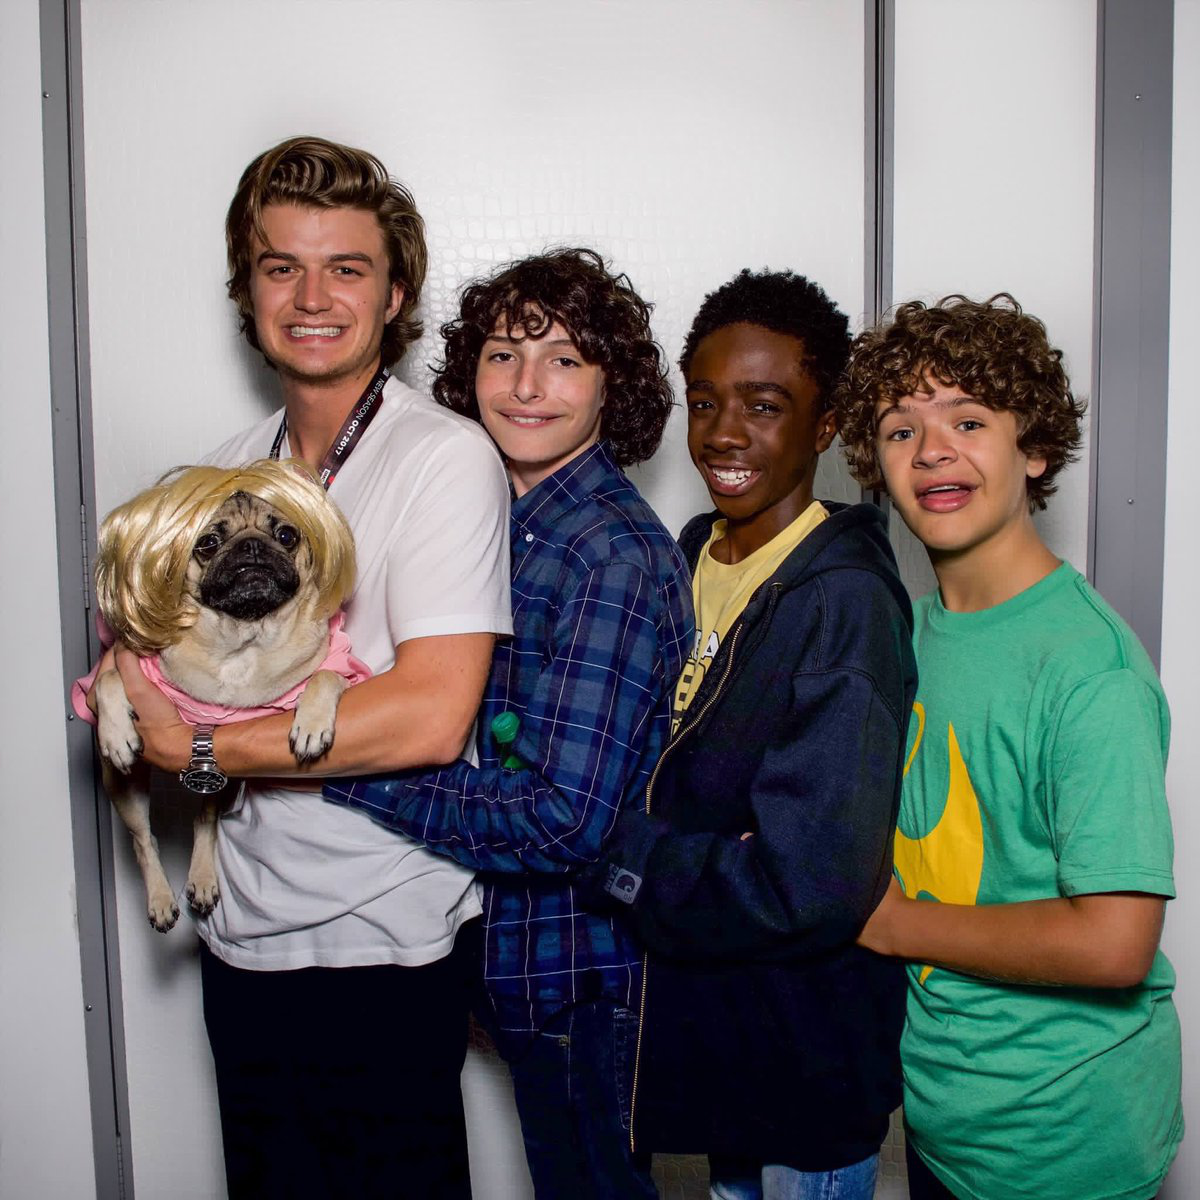

In [2]:
imageURL = "https://pbs.twimg.com/media/DNV_ZH4X0AAZIPv.jpg"

imageResponse = requests.get(imageURL)
image = Image.open(BytesIO(imageResponse.content))
image

In [3]:
serviceURL = 'https://westus.api.cognitive.microsoft.com/vision/v1.0/analyze'
mySuperSecretKey = '484904aaaa4a4285bacc9900ee882726'

# SETUP OUR REQUEST HEADER
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = mySuperSecretKey
params = { 'visualFeatures' : 'Color, Description, Tags'}

def GetDescriptionFromURL():
    json = { 'url': imageURL }
    headers['Content-Type'] = 'application/json'
    response = requests.request( 'post', serviceURL, json = json, data = None, headers = headers, params = params)
    if response.status_code == 200:
        return response.json()
    else:
        return "! ERROR: Something went wrong"

    
result = GetDescriptionFromURL()
print("DESCRIPTION: ", result['description']['captions'][0])


DESCRIPTION:  {'confidence': 0.9897915417502329, 'text': 'a group of people posing for the camera'}


We can see all the data that was returned as JSON in the result if we print out the whole thing:

In [4]:
result

{'color': {'accentColor': '309175',
  'dominantColorBackground': 'White',
  'dominantColorForeground': 'White',
  'dominantColors': ['White', 'Black', 'Grey'],
  'isBWImg': False},
 'description': {'captions': [{'confidence': 0.9897915417502329,
    'text': 'a group of people posing for the camera'}],
  'tags': ['person',
   'standing',
   'posing',
   'indoor',
   'woman',
   'photo',
   'man',
   'holding',
   'people',
   'young',
   'front',
   'brown',
   'smiling',
   'group',
   'room',
   'food',
   'dog',
   'white']},
 'metadata': {'format': 'Jpeg', 'height': 1200, 'width': 1200},
 'requestId': '18685ec5-7ee7-4278-97d8-3426fa38588a',
 'tags': [{'confidence': 0.9995315074920654, 'name': 'person'},
  {'confidence': 0.960118293762207, 'name': 'wall'},
  {'confidence': 0.9593806862831116, 'name': 'standing'},
  {'confidence': 0.9363083839416504, 'name': 'posing'},
  {'confidence': 0.9028338193893433, 'name': 'indoor'}]}

Finally, let's try a local file.

The solution is almost the same, but first let's load a local Image and save a copy of all its pixel data or bytes.


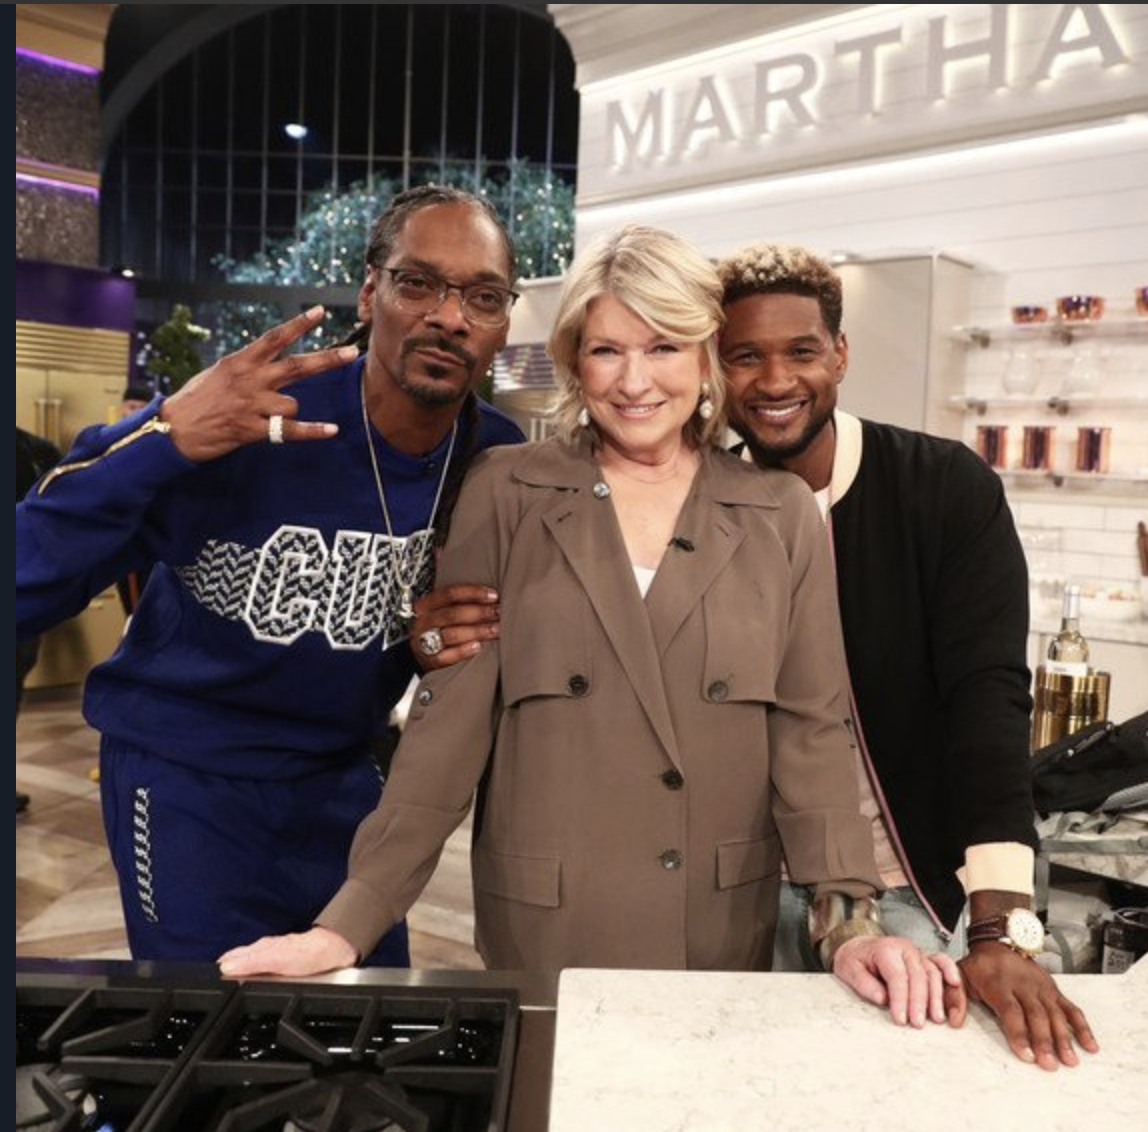

In [5]:
sendBytes = BytesIO()

localImage = Image.open('images/martha.png')
localImage.save(sendBytes, "PNG")
sendBytes.seek(0)

localImage

And now we tweak our call to the server to send it the byte data of the local image and tweaking the header to let the service know we are sending a file stream and not just a url.

In [6]:
def DescriptionFromLocalFile(file_data):
    headers['Content-Type'] = 'application/octet-stream'
    response = requests.request('post', serviceURL, json = None, data = file_data, headers = headers, params = params)
    if response.status_code == 200:
        return response.json()
    else:
        return "! ERROR: Something went wrong"

    
result = DescriptionFromLocalFile(sendBytes)
print("DESCRIPTION: ", result['description']['captions'][0])    


DESCRIPTION:  {'confidence': 0.9683679056007708, 'text': 'Snoop Dogg, Martha Stewart et al. posing for the camera'}


# FACE ANALYSIS

In [7]:
!pip install cognitive_face

In [8]:
import cognitive_face as CF

CF.Key.set('8eb2802d72fb4d16a21c265a360c68ba')
CF.BaseUrl.set('https://westus.api.cognitive.microsoft.com/face/v1.0/')

imageURL

'https://pbs.twimg.com/media/DNV_ZH4X0AAZIPv.jpg'

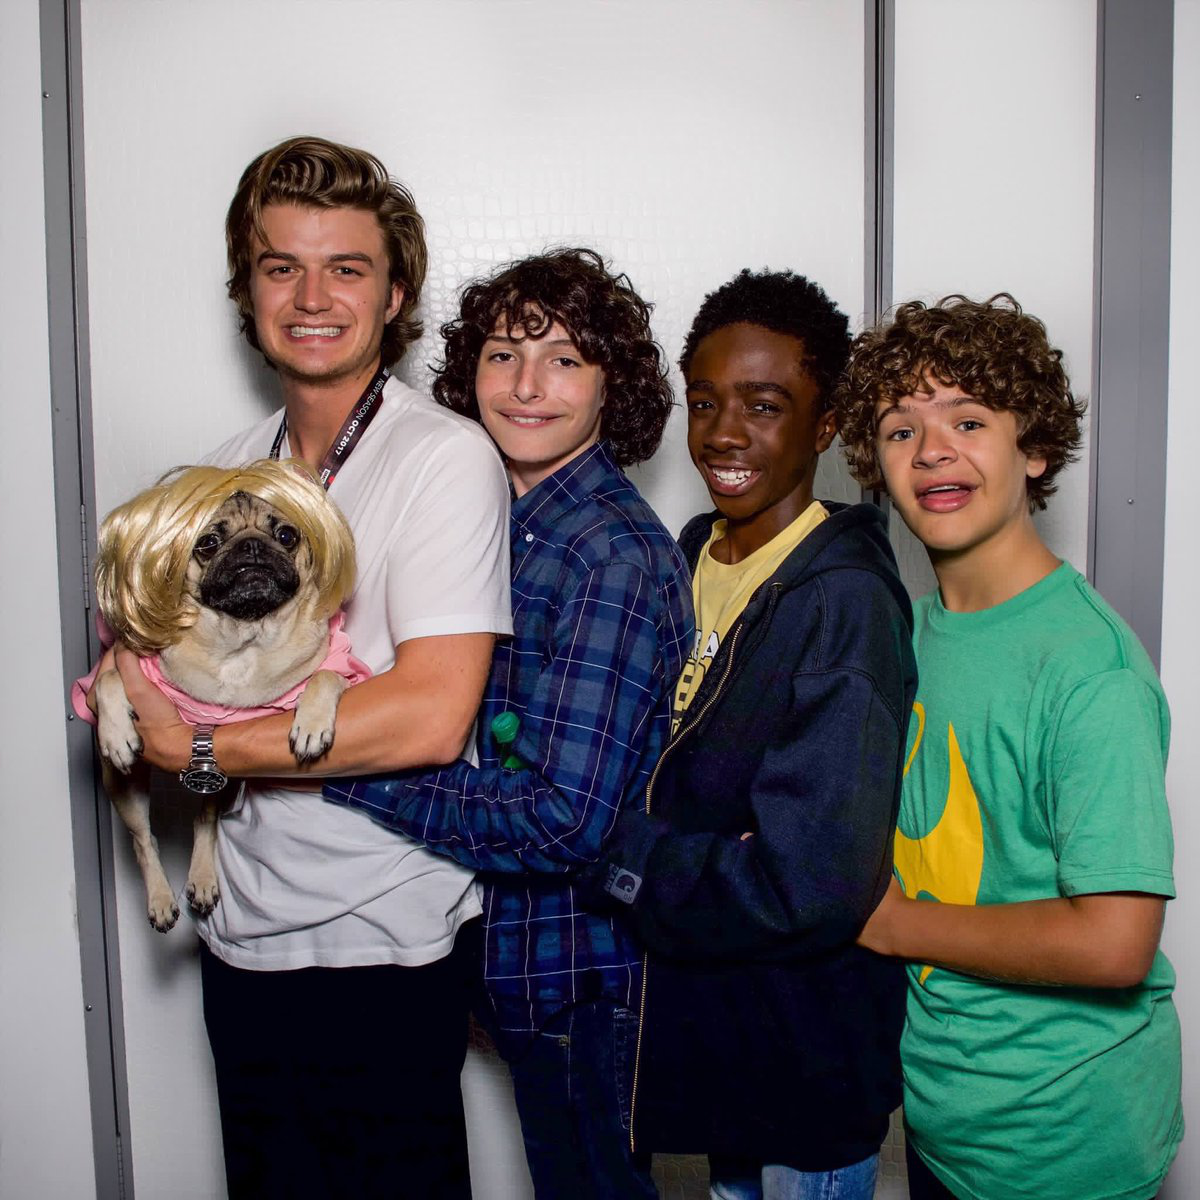

In [9]:
image

In [10]:
faces = CF.face.detect(imageURL, False, False, 'age,gender')
print(faces)

[{'faceAttributes': {'age': 8.5, 'gender': 'male'}, 'faceRectangle': {'top': 386, 'width': 142, 'left': 868, 'height': 142}}, {'faceAttributes': {'age': 28.6, 'gender': 'male'}, 'faceRectangle': {'top': 231, 'width': 135, 'left': 247, 'height': 135}}, {'faceAttributes': {'age': 28.4, 'gender': 'male'}, 'faceRectangle': {'top': 368, 'width': 135, 'left': 664, 'height': 135}}, {'faceAttributes': {'age': 23.1, 'gender': 'male'}, 'faceRectangle': {'top': 320, 'width': 132, 'left': 466, 'height': 132}}]


In [11]:
for i in faces:
    print(i['faceRectangle'])

{'top': 386, 'width': 142, 'left': 868, 'height': 142}
{'top': 231, 'width': 135, 'left': 247, 'height': 135}
{'top': 368, 'width': 135, 'left': 664, 'height': 135}
{'top': 320, 'width': 132, 'left': 466, 'height': 132}


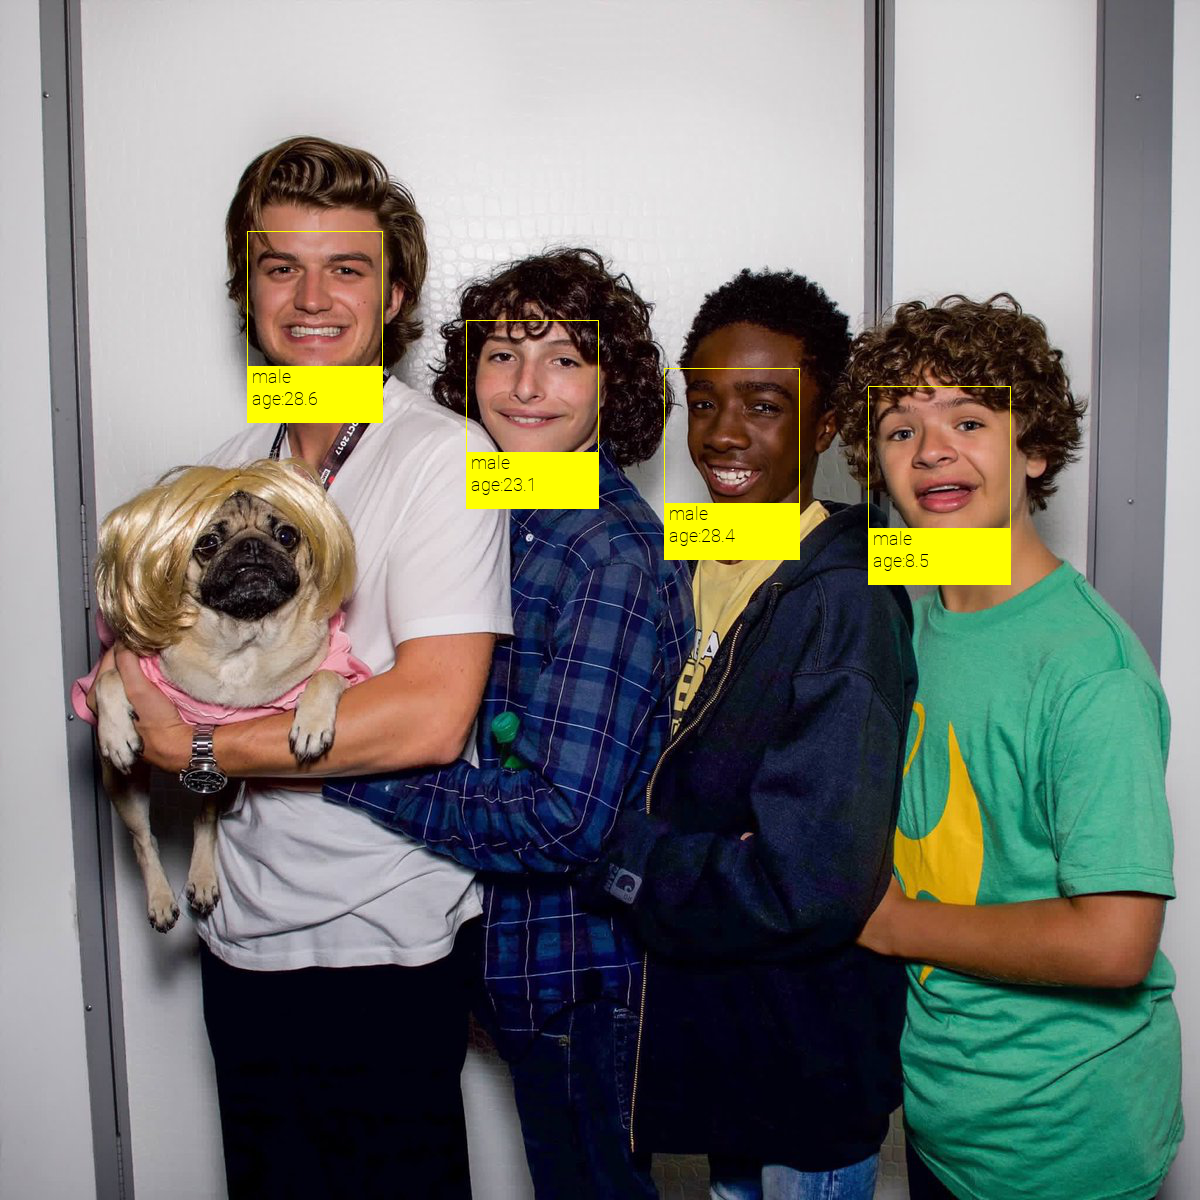

In [12]:
from PIL import ImageDraw
from PIL import ImageFont

imageResponse = requests.get(imageURL)
image = Image.open(BytesIO(imageResponse.content))

# ON WINDOWS, YOU CAN DO THIS...
font = ImageFont.truetype("Roboto-Thin.ttf", 18)

draw = ImageDraw.Draw(image)
txtOutput = str(len(faces)) + " faces found."

for f in faces:
    upperX = f['faceRectangle']['left']
    upperY = f['faceRectangle']['top']
    lowerX = f['faceRectangle']['left'] + f['faceRectangle']['width']
    lowerY = f['faceRectangle']['top'] + f['faceRectangle']['height']
    draw.rectangle(((upperX, upperY),(lowerX, lowerY)), 
                   fill=None, outline="yellow")
    
    draw.rectangle((( upperX, lowerY ), (lowerX, lowerY + 56)), fill="yellow")
    draw.text( (upperX + 5, lowerY), f['faceAttributes']['gender'], (0,0,0), font=font)
    draw.text( (upperX + 5, lowerY + 22), "age:" + str(f['faceAttributes']['age']), (0,0,0), font=font)
    
image